In [34]:
import pandas as pd
import missingno as msno

# Data Gathering

In [28]:
# U.S. Fish & Wildlife Service
# All plants and animals (9612 records, 15 columns)
species = pd.read_html('../Data/fws.html')[0]
species.head()

,Scientific Name,Common Name,Inverted Common Name,Species Code,Population Code,CurrentDistribution,Family,First Listed,Species Group,Lead Region,Federal Listing Status,Regions ofOccurrence,U.S. or ForeignListed,Vertebrate/Invertebrate/Plant,Where Listed
0,Abies fraseri,Fraser fir,"Fir, Fraser",R00B,P01,"NC, VA;",Pinaceae,NaN,Conifers and Cycads,4,Not Listed,"4, 5",US,P,Wherever found
1,Abies guatemalensis,Guatemalan Fir (=pinabete),"Fir, Guatemalan (=pinabete)",R003,P01,"Mexico, Honduras, Guatemala, El Salvador",Pinaceae,"Dec 10, 1979",Conifers and Cycads,Foreign,Threatened,NaN,Foreign,P,Wherever found
2,Ablautus schlingeri,Oso Flaco robber fly,"Robber fly, Oso Flaco",I0O3,I01,CA;,Asilidae,NaN,Insects,1,Not Listed,8,US,I,Wherever found
3,Abronia alpina,Ramshaw Meadows sand-verbena,"Sand-verbena, Ramshaw Meadows",Q009,P01,CA;,Nyctaginaceae,NaN,Flowering Plants,8,Not Listed,8,US,P,Wherever found
4,Abronia ammophila,Yellowstone Sand Verbena,Verbena Yellowstone Sand,Q3LO,P01,NaN,Nyctaginaceae,NaN,Flowering Plants,6,Not Listed,NaN,US,P,Wherever found


# Data Cleaning

In [46]:
# get column names
species.columns

Index(['Scientific Name', 'Common Name', 'Inverted Common Name',
       'Species Code', 'Population Code', 'CurrentDistribution', 'Family',
       'First Listed', 'Species Group', 'Lead Region',
       'Federal Listing Status', 'Regions ofOccurrence',
       'U.S. or ForeignListed', 'Vertebrate/Invertebrate/Plant',
       'Where Listed'],
      dtype='object')

In [49]:
# drop secondary species names
species = species.drop(['Inverted Common Name'], axis=1)

Scientific Name                     0
Common Name                         0
Species Code                        0
Population Code                     0
CurrentDistribution               860
Family                              0
First Listed                     7088
Species Group                       0
Lead Region                        73
Federal Listing Status              0
Regions ofOccurrence             1550
U.S. or ForeignListed              74
Vertebrate/Invertebrate/Plant       0
Where Listed                       22
dtype: int64


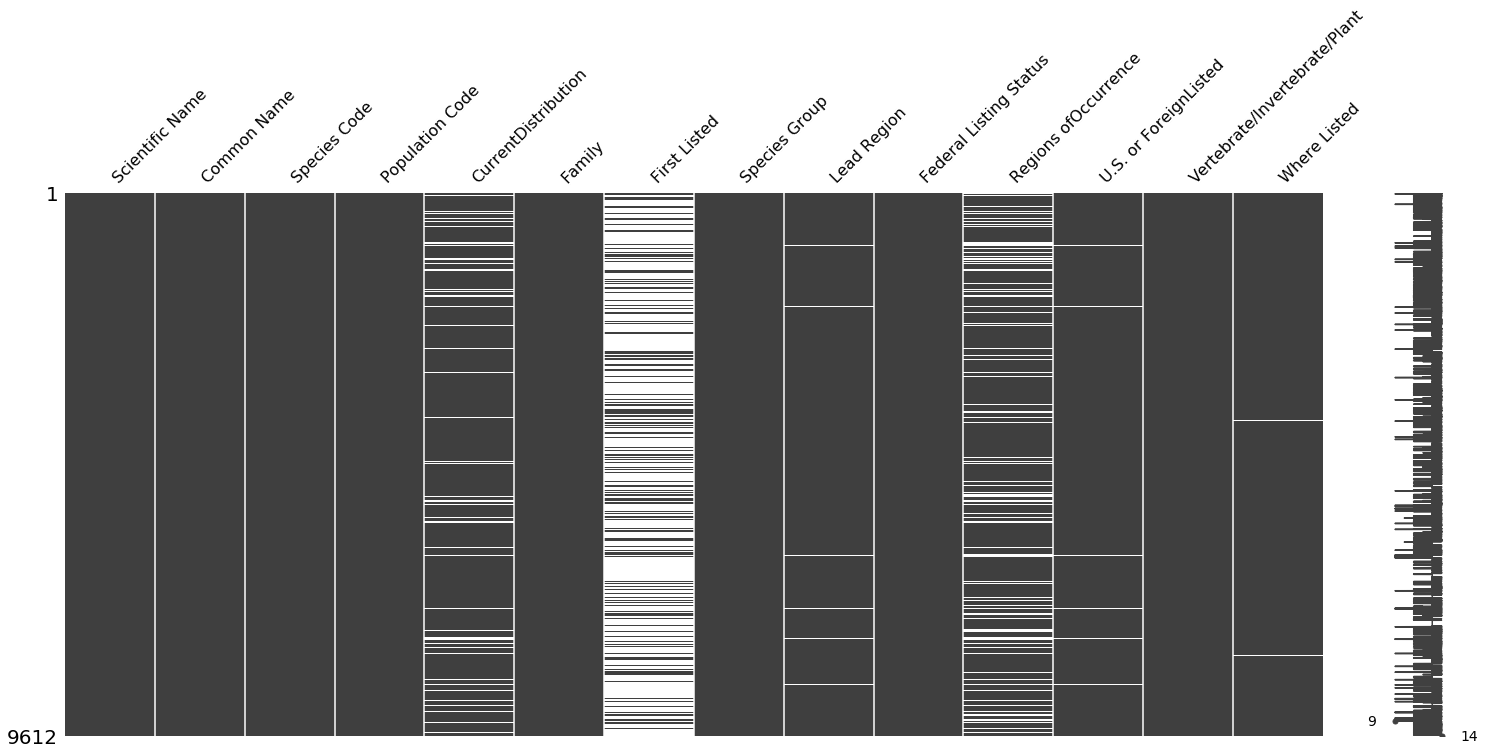

In [50]:
# check species data for null values
print(species.isnull().sum())

# visualize null values
msno.matrix(species)

In [21]:
species['Federal Listing Status'].unique()

array(['Not Listed', 'Threatened', 'Endangered',
       'Under Review in the Candidate or Petition Process',
       'Proposed Endangered',
       'Original Data in Error - Not a listable entity',
       'Similarity of Appearance to a Threatened Taxon', 'Extinction',
       'Original Data in Error - Taxonomic Revision',
       'Experimental Population, Non-Essential', 'Candidate',
       'Pre-Act Delisting (or clearance--removal from the Lists)',
       'Recovery', 'Original Data in Error - New Information Discovered',
       'Proposed Threatened',
       'Proposed Experimental Population, Non-Essential',
       'Original Data in Error - Act Amendment',
       'Original Data in Error - Erroneous Data',
       'Proposed Similarity of Appearance to a Threatened Taxon'],
      dtype=object)

In [25]:
species.groupby('Federal Listing Status')['Federal Listing Status'].count()

Federal Listing Status
Candidate                                                     22
Endangered                                                  1865
Experimental Population, Non-Essential                        64
Extinction                                                    11
Not Listed                                                  6533
Original Data in Error - Act Amendment                         1
Original Data in Error - Erroneous Data                        1
Original Data in Error - New Information Discovered            6
Original Data in Error - Not a listable entity                 5
Original Data in Error - Taxonomic Revision                    7
Pre-Act Delisting (or clearance--removal from the Lists)       3
Proposed Endangered                                            5
Proposed Experimental Population, Non-Essential                1
Proposed Similarity of Appearance to a Threatened Taxon        1
Proposed Threatened                                           11
Re

In [27]:
(1865 + 6533 + 477) / 9612

0.9233250104036621